# Pymaceuticals Inc.
---

### Analysis

"Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook."


1. OBS: Capomulin had the greatest quantitiy of observed mouse timepoints.
2. OBS: Ramicane had the lowest SEM. (Note: "Standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean."  https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp)
3. INF: The tumor volume of mouse m601 decreased over time. Additionally, the search for Capomulin's outliers yielded no resutls. This suggests that Capomulin is an effective treatment (although I have not compared these results against a control group, and in real life, I would absolutely NOT draw such a conclusion until I compared the results of Capomulin intervention and no intervention/placebo over the same timeframe).

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Displaying only the first instance of each Mouse ID per the starter code value display
unique_merged_data = merged_data.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=False)
unique_merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mice_count = merged_data['Mouse ID'].nunique()
print("Number of unique mice IDs:", mice_count)

Number of unique mice IDs: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merged_data[merged_data[['Mouse ID', 'Timepoint']].duplicated() == True]
dupmouse = duplicate_data.iloc[0]['Mouse ID']
print(f"Duplicate mouse ID: {dupmouse}")

Duplicate mouse ID: g989


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
display(duplicate_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropmouse = "g989"
boolmask = merged_data['Mouse ID'] != "g989"
cleandata = merged_data[boolmask]
cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Displaying only the first instance of each Mouse ID per the starter code value display
unique_cleandata = cleandata.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=False)
unique_cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
cleancount = cleandata['Mouse ID'].nunique()
print(cleancount)

248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Calculate the mean
mean = cleandata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#Calculate the median
median = cleandata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#Calculate the variance
var = cleandata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#Calculate the standard deviation
std= cleandata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#Calculate the SEM
sem = cleandata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [13]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Standard Deviation Tumor Volume',
    'sem': 'SEM Tumor Volume'
})
display(summary_statistics)

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sumagg = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
display(oneline)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

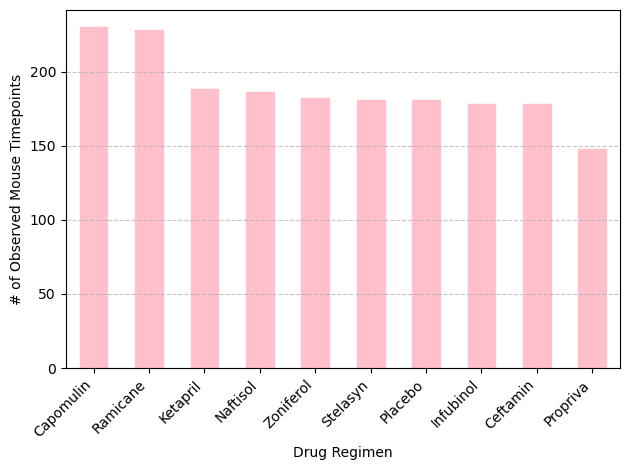

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleandata['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='pink', edgecolor='pink')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

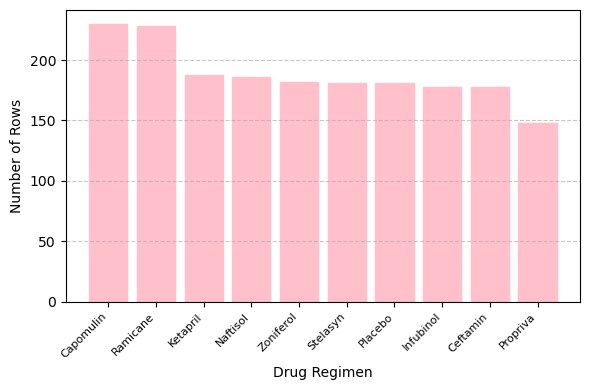

In [165]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
# Note to self: already declared drug_regimen_counts in previous cell
drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

plt.figure(figsize=(6, 4))
plt.bar(drug_regimens, counts, color='pink', edgecolor='pink')

plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('Number of Rows', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

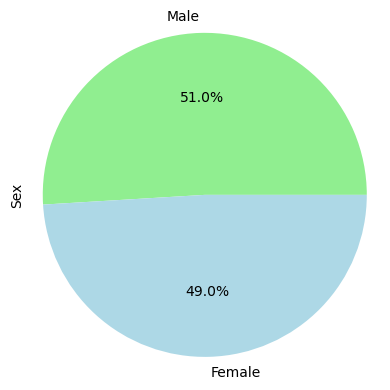

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexcounts = cleandata['Sex'].value_counts()

plt.figure(figsize=(4, 4))  
colors = ['lightgreen', 'lightblue']  
sexcounts.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=0)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.tight_layout()
plt.show()

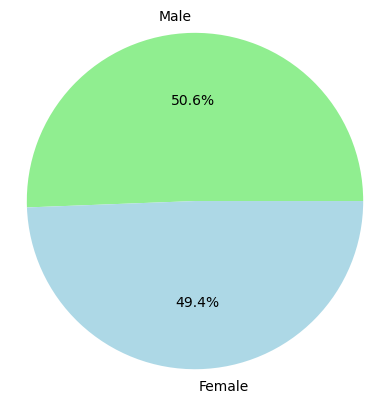

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = merged_data['Sex'].value_counts()

plt.figure(figsize=(4, 4)) 
colors = ['lightgreen', 'lightblue']
labels = sex_counts.index
plt.pie(sex_counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=0)

plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoints = cleandata.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Even though the instructions in the starter code say "original DataFrame,"
# The instructions on Module 5 say to use my cleaned DataFrame to generate results
# So I'm going to use cleandata instead of merged_data
finaltumorvol = pd.merge(lasttimepoints.reset_index(), cleandata, on=['Drug Regimen', 'Mouse ID', 'Timepoint'])
treatmentreg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
finaltumorvol = finaltumorvol[finaltumorvol['Drug Regimen'].isin(treatmentreg)]
finaldf = (finaltumorvol[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])
finaldf.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,45,38.982878
1,b742,Capomulin,45,38.939633
2,f966,Capomulin,20,30.485985
3,g288,Capomulin,45,37.074024
4,g316,Capomulin,45,40.159220


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

## Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolume = finaldf.loc[finaldf['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor_vol_data list
    tumorvoldata.append(tumorvolume)
    
    # Calculate the quartiles and IQR
    quartiles = tumorvolume.quantile([0.25, 0.5, 0.75])
    lowerquart = quartiles[0.25]
    upperquart = quartiles[0.75]
    iqr = upperquart - lowerquart
    
    # Determine outliers using upper and lower bounds
    lowerbound = lowerquart - 1.5 * iqr
    upperbound = upperquart + 1.5 * iqr
    
    outliers = tumorvolume[(tumorvolume < lowerbound) | (tumorvolume > upperbound)]
    display(f"{treatment}'s potential outliers: {outliers}")

#I prefer to display loops rather than print to give my eyes a break
# ATTN: I do not understand why I returned a result of "55" for "Infubinol's potential outliers" instead of "31" per starter code
#Must ask during office hours
#If I don't figure out how to change this value before the due date, 
# Central Grader, please enlighten me to my mistake if possible!

"Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)"

"Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)"

"Infubinol's potential outliers: 55    36.321346\nName: Tumor Volume (mm3), dtype: float64"

"Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)"

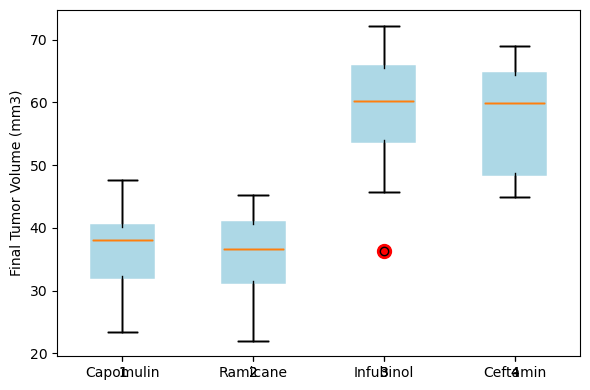

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 4))
plt.boxplot(tumorvoldata, labels=treatments, patch_artist=True)

# Customize the plot
plt.ylabel('Final Tumor Volume (mm3)', fontsize=10)

# Highlight potential outliers by changing their color and style
boxprops = dict(facecolor='lightblue', color='lightblue', linewidth=4)
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, markeredgecolor='red')

for box in plt.boxplot(tumorvoldata, patch_artist=True)['fliers']:
    box.set(**flierprops)

for box in plt.boxplot(tumorvoldata, patch_artist=True)['boxes']:
    box.set(**boxprops)

plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [136]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I randomly chose mouse ID m601 because starter code's suggested ID i509 does not seem to appear in actual dataset/.csv files
# Resultant lien graph will look slightly different from starer code

capomulindata = cleandata[cleandata['Drug Regimen'] == 'Capomulin']
mouseid = 'm601'

mousedata = capomulindata[capomulindata['Mouse ID'] == mouseid]

# I had to display mousedata as a dataframe because I had trouble with this code
# And I thought I was going insane for a minute

display(mousedata)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


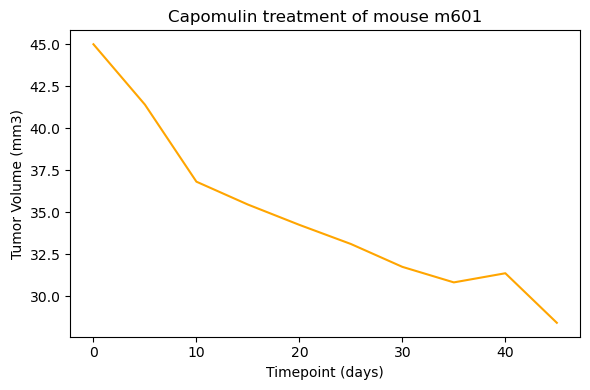

In [139]:

plt.figure(figsize=(6, 4))
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'], marker='', linestyle='-', color='orange')
plt.xlabel('Timepoint (days)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)
plt.title(f'Capomulin treatment of mouse {mouseid}', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

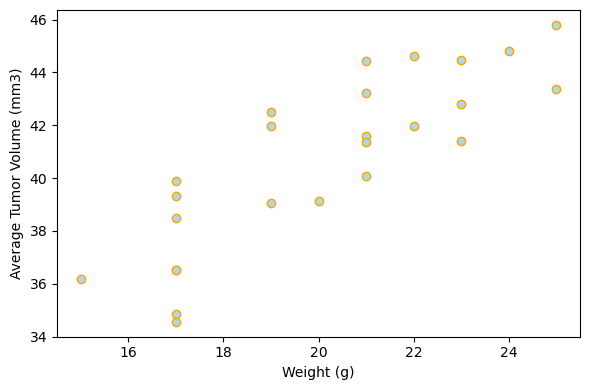

In [150]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume and mouse weight for each mouse in the Capomulin group
avgtumorvol = capomulindata.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouseweight = capomulindata.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot for average tumor volume vs. mouse weight
plt.figure(figsize=(6, 4))
plt.scatter(mouseweight, avgtumorvol, color='lightblue', edgecolor='orange')
plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)
#Note to self
#since the default grid value is false, I don't actually need to write plt.grid(False) like I did for the line graph
plt.tight_layout()
plt.show()

## Correlation and Regression

In [153]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Time to use NumPy
import numpy as np
import matplotlib.pyplot as plt

corrcoef = np.corrcoef(mouseweight, avgtumorvol)[0, 1]
coefficients = np.polyfit(mouseweight, avgtumorvol, 1)
slope = coefficients[0]
intercept = coefficients[1]

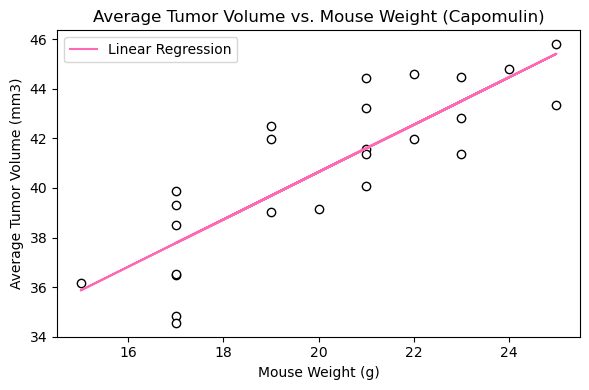

The correlation between mouse weight and the average tumor volume is 0.84.


In [164]:
plt.figure(figsize=(6, 4))
plt.scatter(mouseweight, avgtumorvol, color='white', edgecolor='black')
plt.plot(mouseweight, intercept + slope * mouseweight, color='hotpink', label='Linear Regression')
plt.xlabel('Mouse Weight (g)', fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

corrcoefround = round(corrcoef, 2)
print(f"The correlation between mouse weight and the average tumor volume is {corrcoefround}.")